In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

In [2]:
from joblib import Memory

from lint.models import Token

mem = Memory('cache')

token_counts = mem.cache(Token.token_counts)

tokens = token_counts(50000)

In [3]:
import numpy as np

from statsmodels.nonparametric.kde import KDEUnivariate

def token_density(token, bw=2, *args, **kwargs):
    
    # Get the raw token series.
    series = Token.token_series(token, *args, **kwargs)
    
    # Use the raw counts as weights.
    weights = np.array(list(series.values()), dtype=float)

    # Estimate density.
    density = KDEUnivariate(list(series.keys()))
    density.fit(weights=weights, bw=bw, fft=False)
    
    return density.density

In [4]:
import numpy as np

def rel_series(token, *args, **kwargs):
    
    series = Token.token_series(token, *args, **kwargs)
    
    total_count = sum(series.values())
    
    f_obs = np.zeros(100)
    
    for offset, count in series.items():
        f_obs[offset] = count/total_count
        
    return f_obs

In [5]:
import numpy.polynomial.polynomial as poly

def plot_time_slices(token, y1=1840, y2=2000, w=20):
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    
    cm = plt.get_cmap('plasma')
    
    years = range(y1, y2, w)
    
    colors = [
        cm(1.*i/len(years))
        for i in range(len(years))
    ]
    
    ax.set_color_cycle(colors)
    
    for y in years:
        
        # Plot the raw series.
        Y = rel_series(token, year1=y, year2=y+w)
        ax.plot(Y)
        
        X = np.arange(100)
        
        coef = poly.polyfit(X, Y, 3)
        ffit = poly.polyval(X, coef)
        
        # Plot fit.
        ax.plot(X, ffit, color='gray')
        
    print(token)
    plt.show()

the


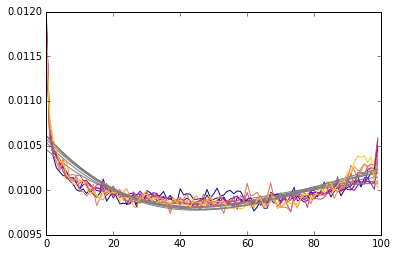

and


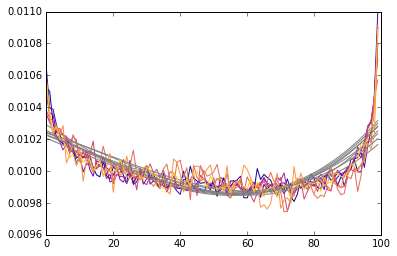

to


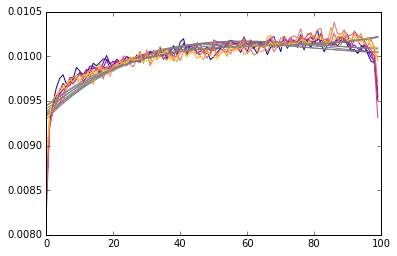

of


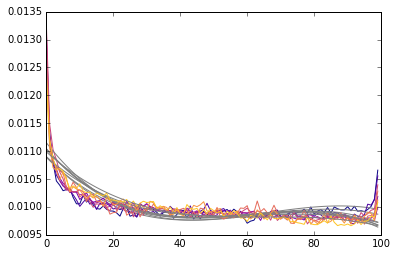

a


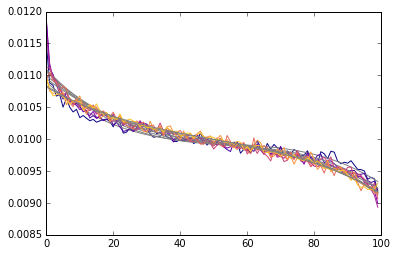

i


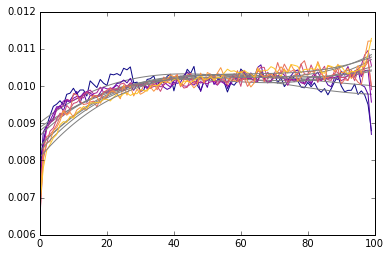

in


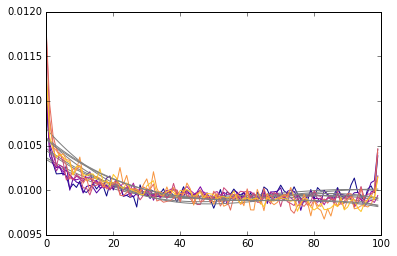

he


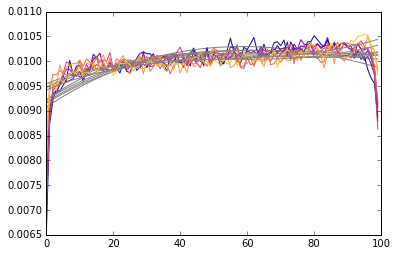

was


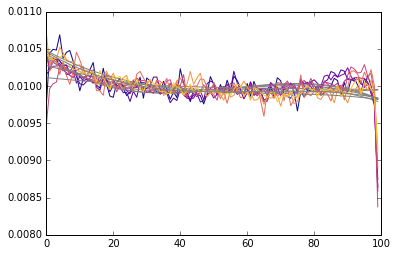

that


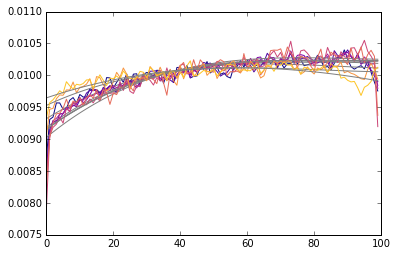

it


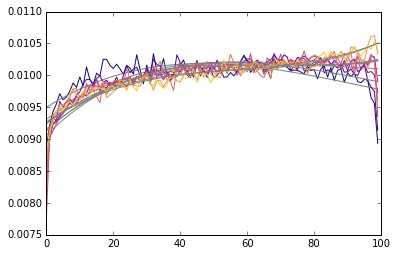

you


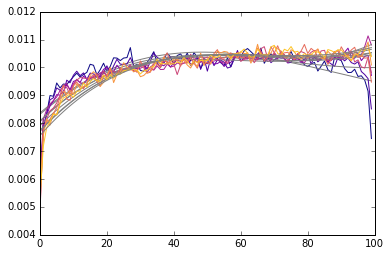

his


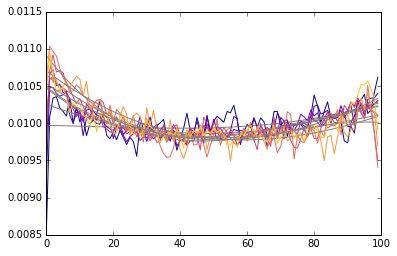

her


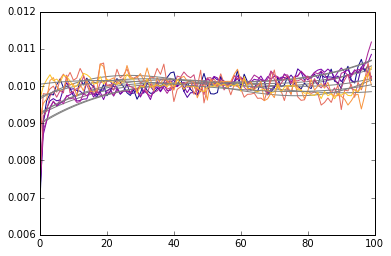

she


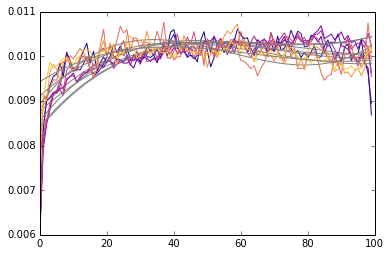

had


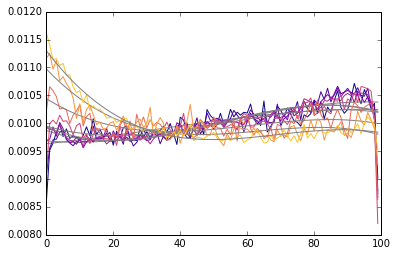

with


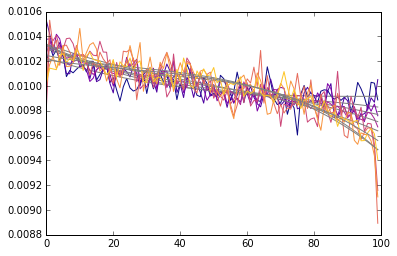

for


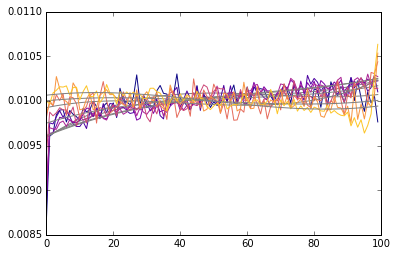

as


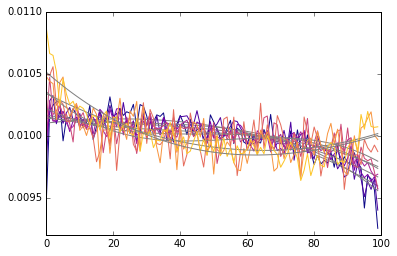

but


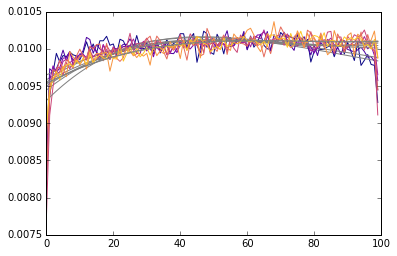

not


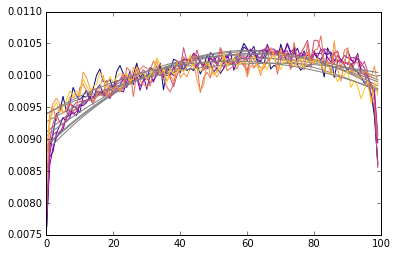

at


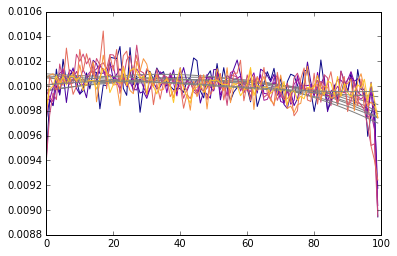

on


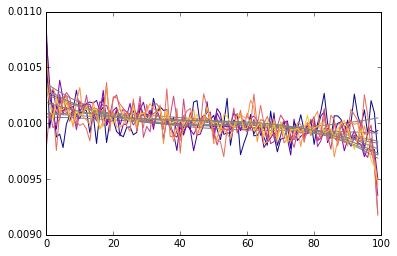

is


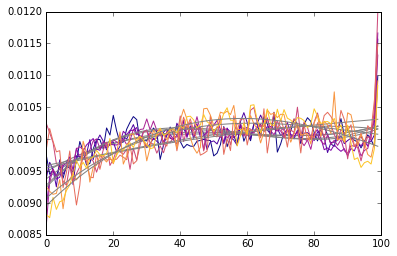

be


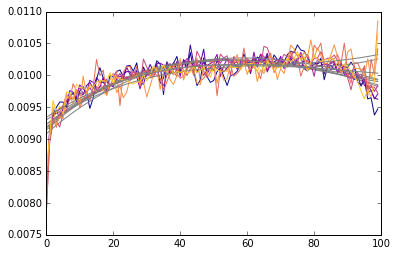

him


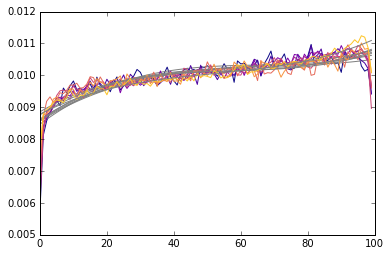

said


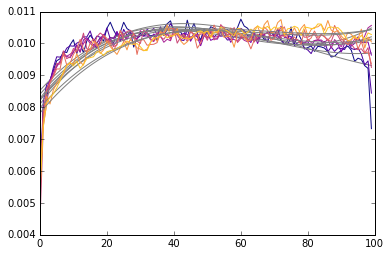

have


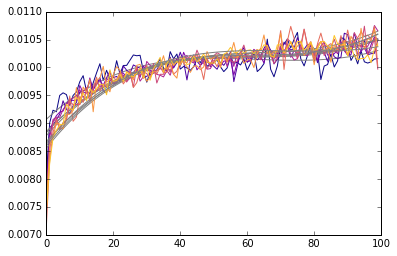

my


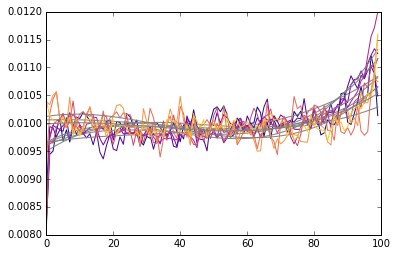

me


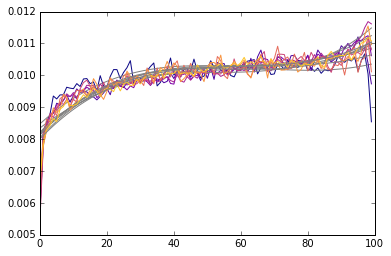

they


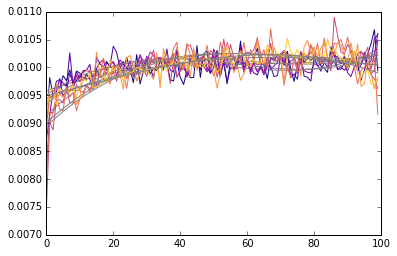

from


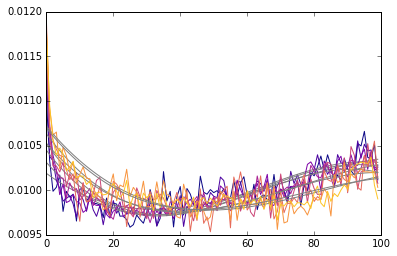

this


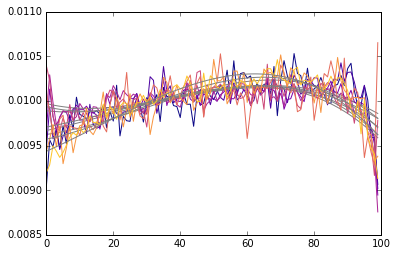

all


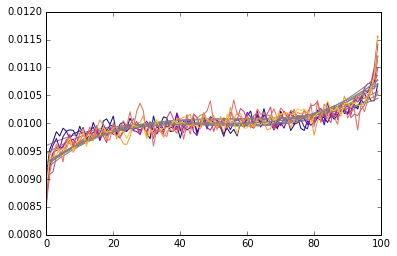

were


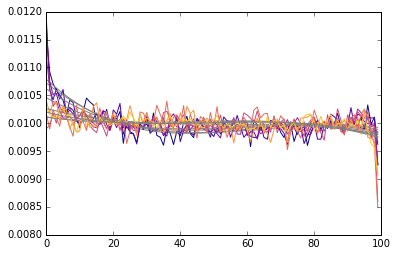

so


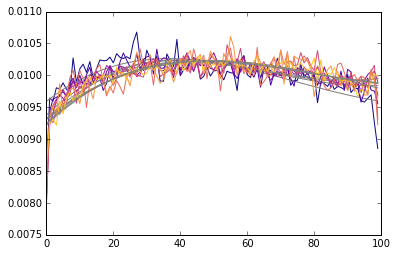

one


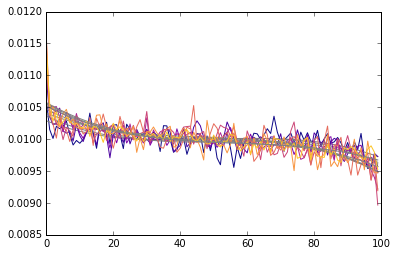

by


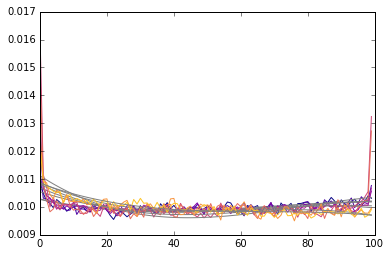

would


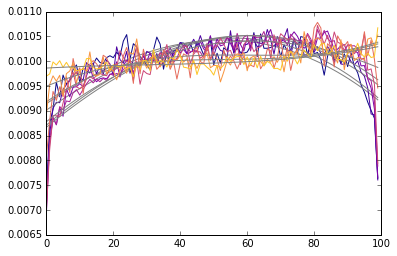

there


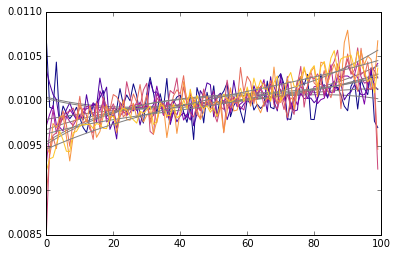

if


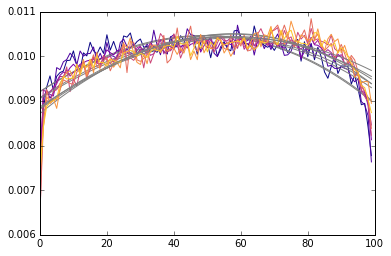

what


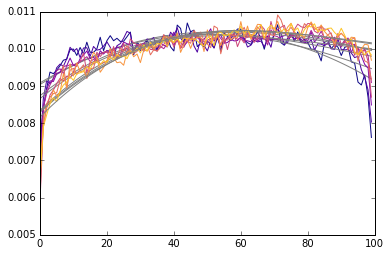

an


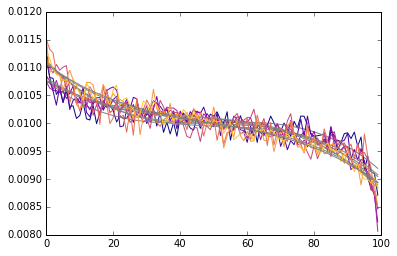

no


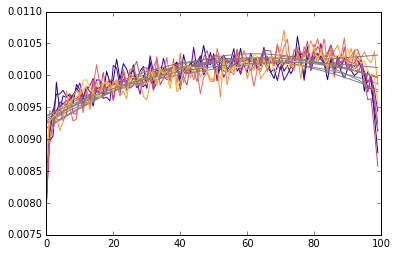

out


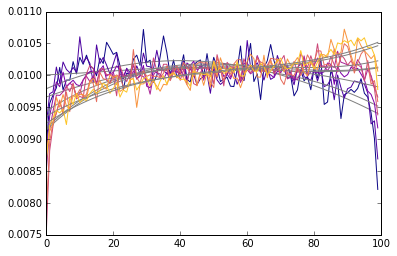

we


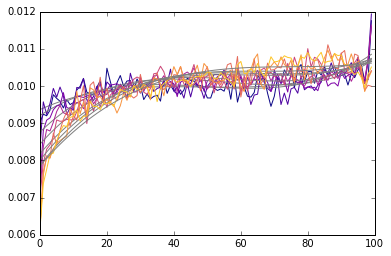

when


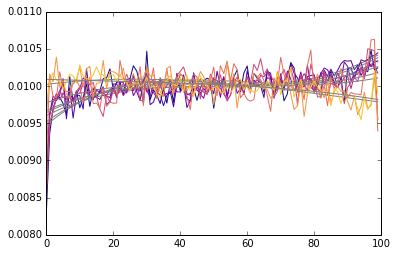

up


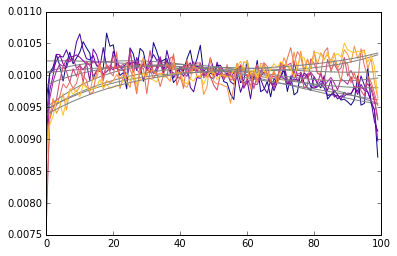

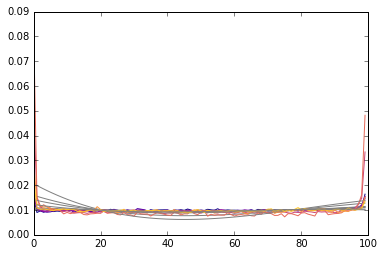

been


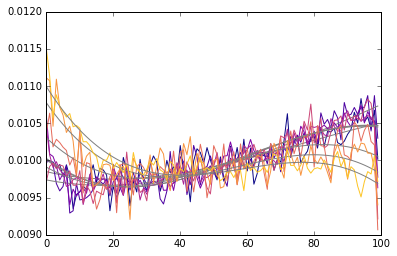

which


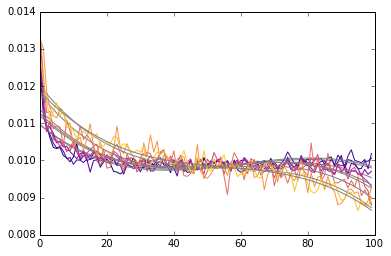

do


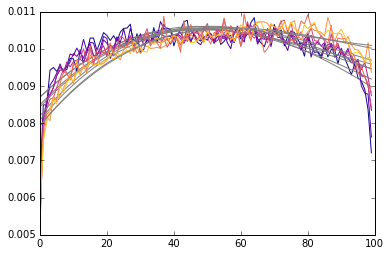

or


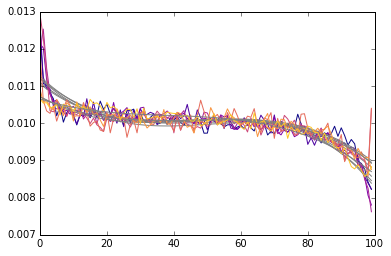

them


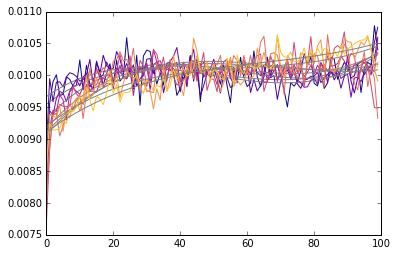

could


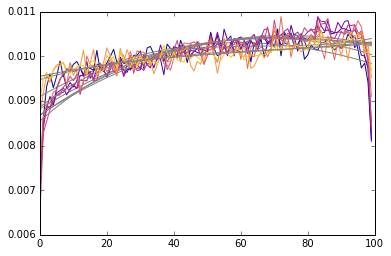

then


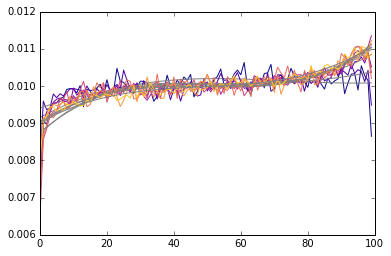

are


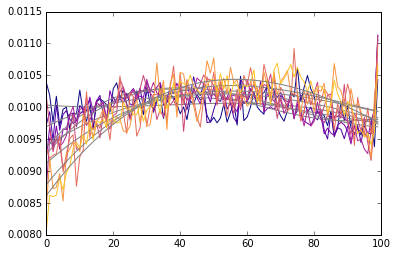

who


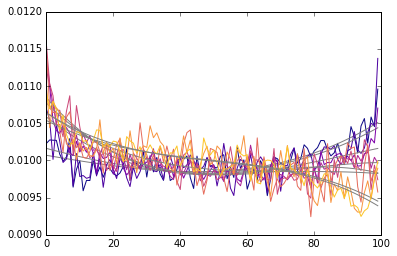

their


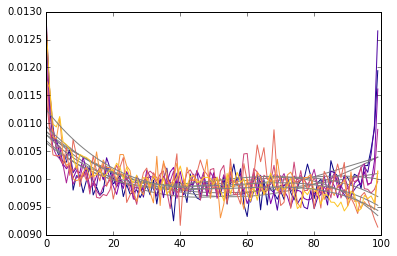

your


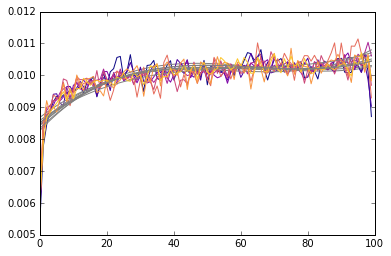

will


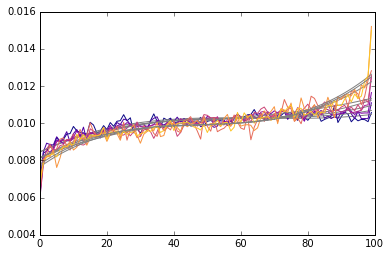

into


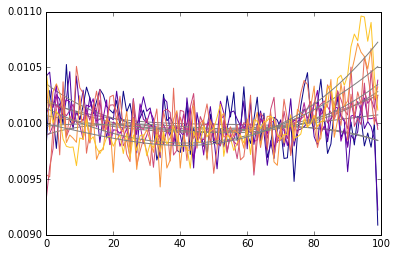

about


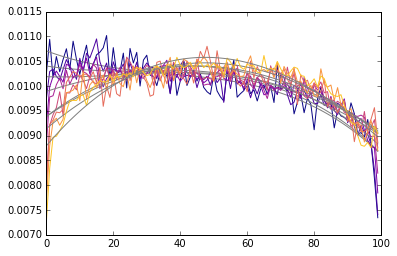

now


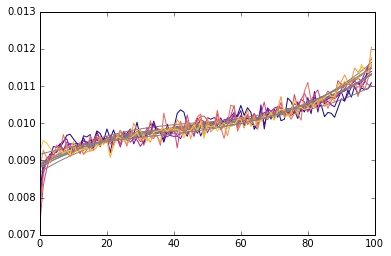

like


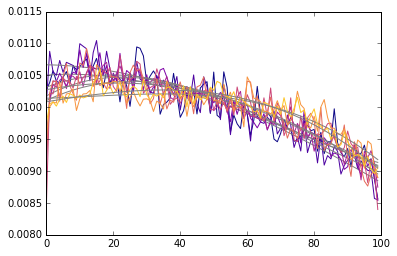

did


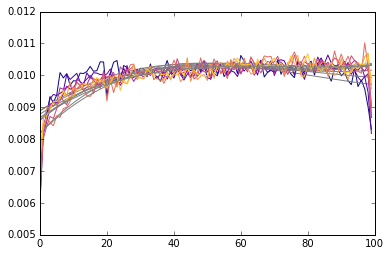

more


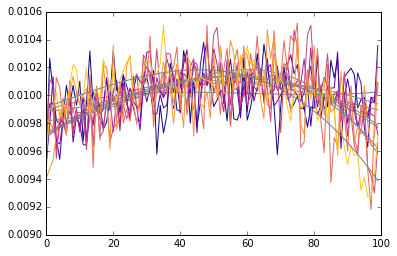

know


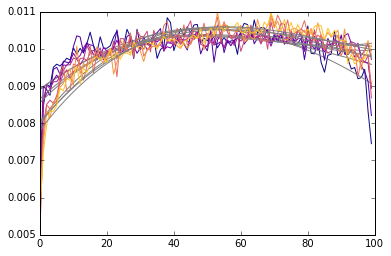

man


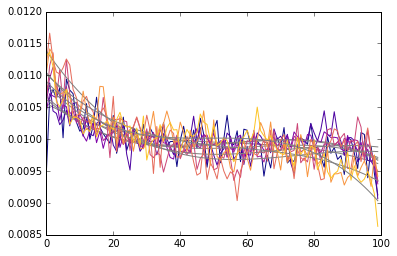

its


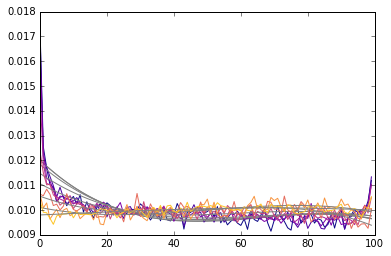

time


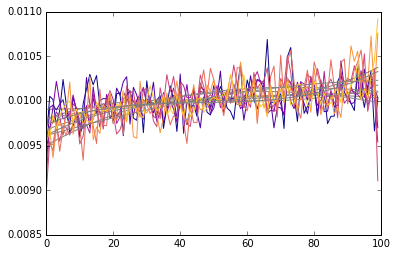

some


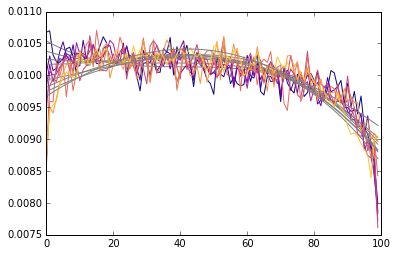

over


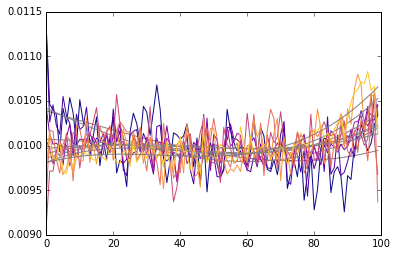

little


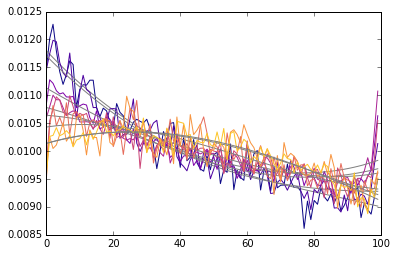

down


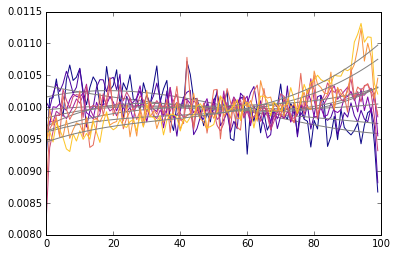

can


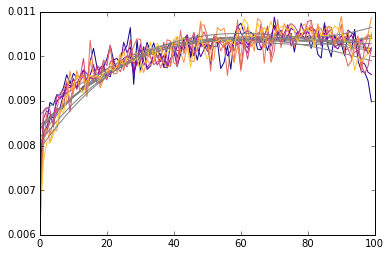

back


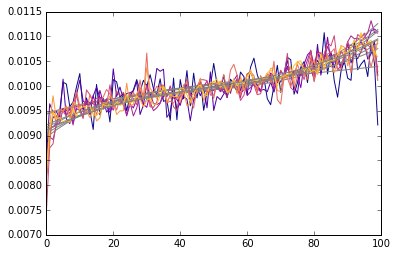

see


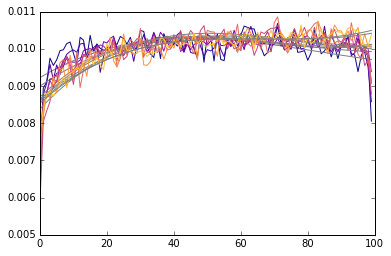

well


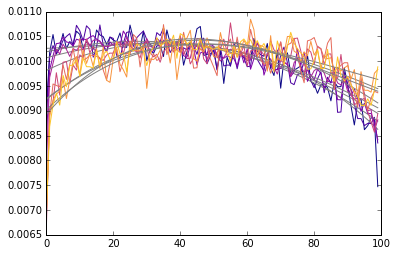

only


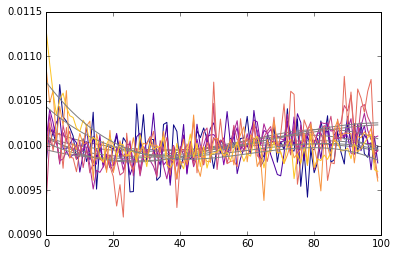

how


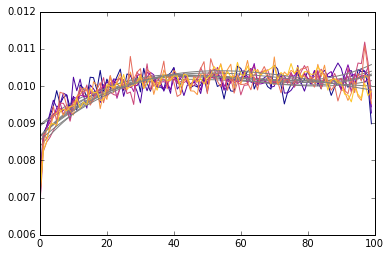

than


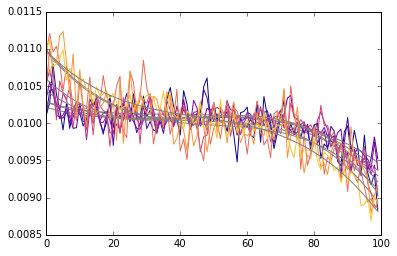

before


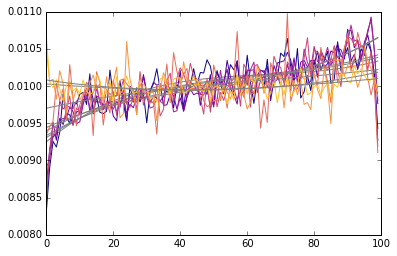

very


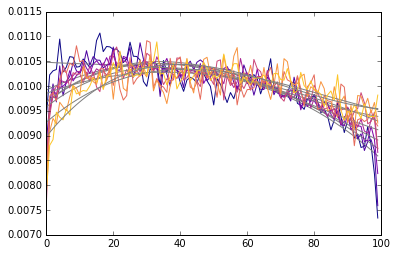

just


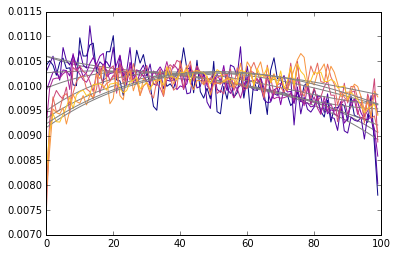

after


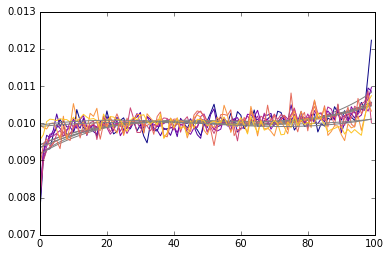

any


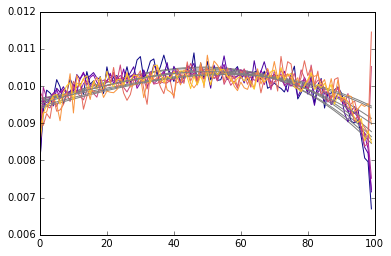

go


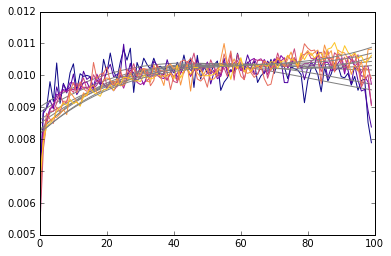

here


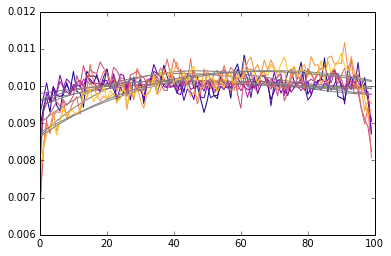

never


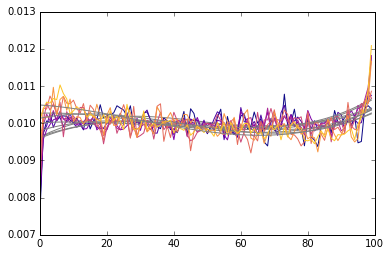

come


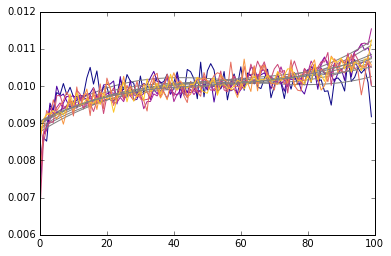

upon


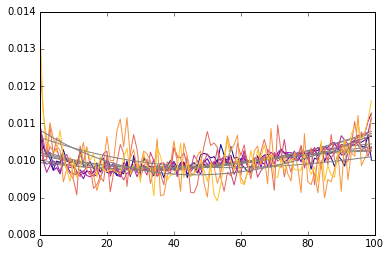

dont


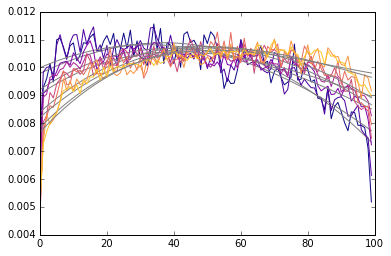

way


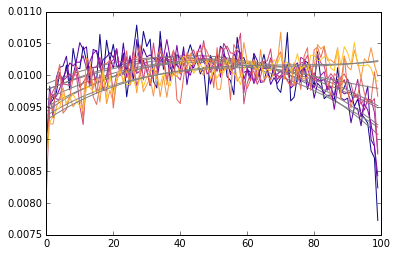

has


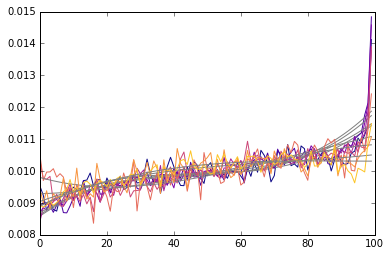

eyes


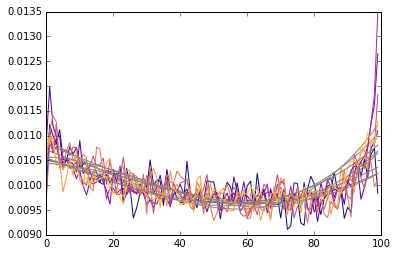

old


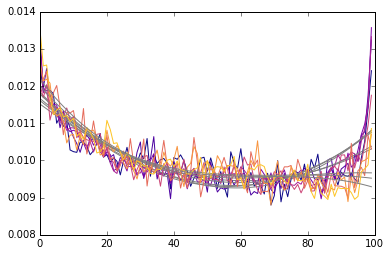

other


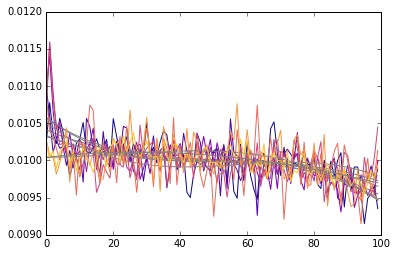

think


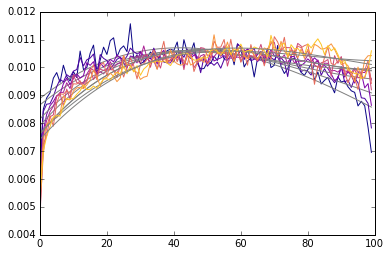

mr


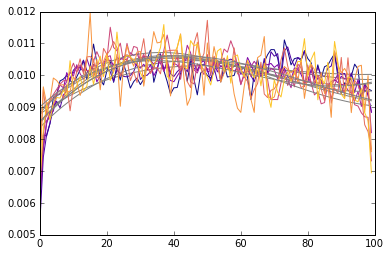

In [6]:
for t in list(tokens.keys())[:100]:
    plot_time_slices(t)